# Medical Data Visualization

---



# **Summary**

In this project, I will visualize and make calculations from medical examination data using matplotlib, seaborn, and pandas. The dataset values were collected during medical examinations.

At the end, we will have two diagrams: (i) the counts of good  bad outcomes for the cholesterol, gluc, alco, active, and smoke variables, (ii) correlation matrix of a dataset

---



Data description:
The rows in the dataset represent patients and the columns represent information like body measurements, results from various blood tests, and lifestyle choices. I will use the dataset to explore the relationship between cardiac disease, body measurements, blood markers, and lifestyle choices.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image
data= pd.read_csv('medical_examination.csv')
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


**I will create a chart, which shows the counts of good and bad outcomes for the cholesterol, gluc, alco, active, and smoke variables for patients with cardio=1 and cardio=0 in different panels.**

By following these steps:
* Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.
* Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.
* Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot(). The dataset should be split by 'Cardio' so there is one chart for each cardio value. The chart should look like examples/Figure_1.png.
* Clean the data. Filter out the following patient segments that represent incorrect data:
diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
height is more than the 97.5th percentile
weight is less than the 2.5th percentile
weight is more than the 97.5th percentile

In [ ]:
BMI = (data['weight']/((data['height'])/100)**2)

In [ ]:
data.loc[ BMI<= 25, 'overweight'] = 0
data.loc[ BMI > 25, 'overweight'] = 1
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0.0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1.0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0.0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1.0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0.0


In [ ]:
data.loc[ data['cholesterol']== 1, 'cholesterol'] = 0
data.loc[ data['cholesterol']> 1, 'cholesterol'] = 1

In [ ]:
data.loc[ data['gluc']== 1, 'gluc'] = 0
data.loc[ data['gluc']> 1, 'gluc'] = 1

In [ ]:
def draw_cat_plot():
    data_cat = pd.melt(data, id_vars=['cardio'], value_vars=['active','alco','cholesterol','gluc','overweight','smoke'] )
    
    figure = sns.catplot(x='variable',kind='count',hue='value',data=data_cat,col='cardio')
    figure.set_axis_labels('variable','total')
    fig = figure.fig

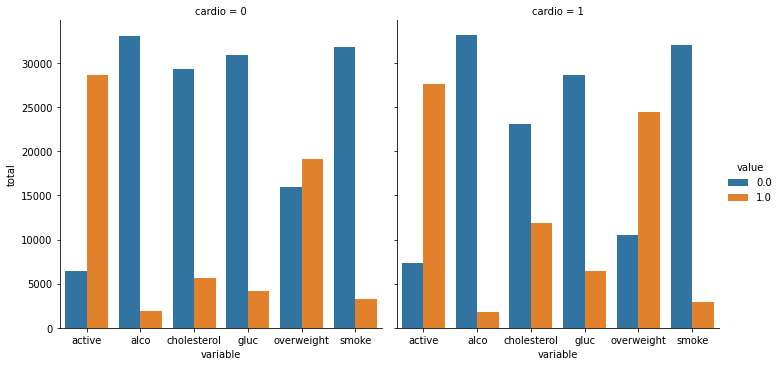

In [ ]:
draw_cat_plot()

In [ ]:
data_heat = data[(data['ap_lo'] <= data['ap_hi']) & (data['height'] >= data['height'].quantile(0.025)) & (data['height'] <= data['height'].quantile(0.975)) & (data['weight'] >= data['weight'].quantile(0.025)) & (data['weight'] <= data['weight'].quantile(0.975))]
data_heat.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0.0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1.0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0.0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1.0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0.0


**I will create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap(). Mask the upper triangle.**

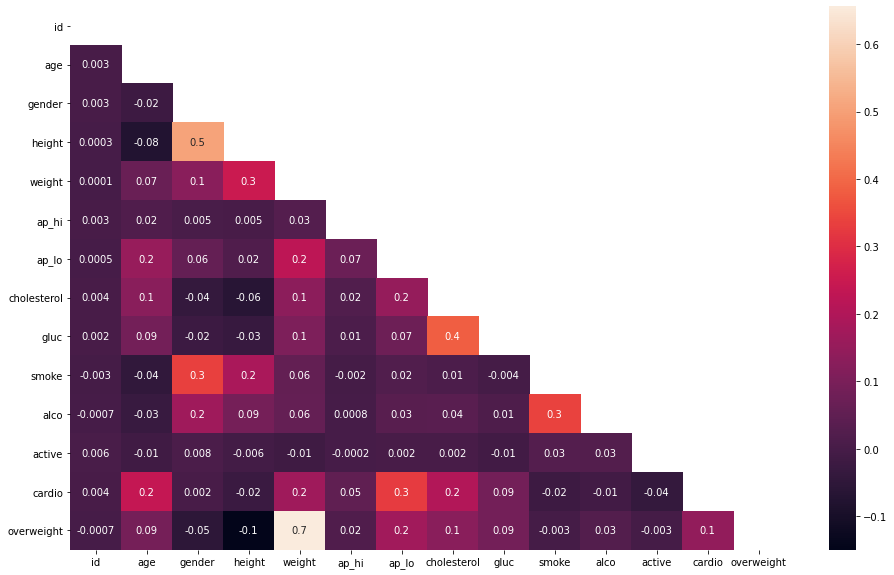

In [ ]:
plt.figure(figsize = (16,10))
matrix = np.triu(data_heat.corr())
sns.heatmap(data_heat.corr(), annot=True, mask=matrix,fmt='.1g')